# **MLOps basic**

In [120]:
# MLOps Stands for  Machine Learning Operations, which is a set of practices that manage the machine learning (ML) lifecycle:

# Development:  Creating models
# Deployment:   Making models available to applications
# Monitoring:   Detecting issues and performance degradation
# Retraining:   Improving model performance with new data 

In [58]:
   # why we are Learning MLOps :-

# (i)  Fast Delivery
# (ii) Improved productivity
# (iii) Efficient Model Deployment
# (iv)  Risk Reduction
# (v)   Better Communication

**MLOps Overflow**

In [59]:
# Dev means Developer
# Ops means operation team

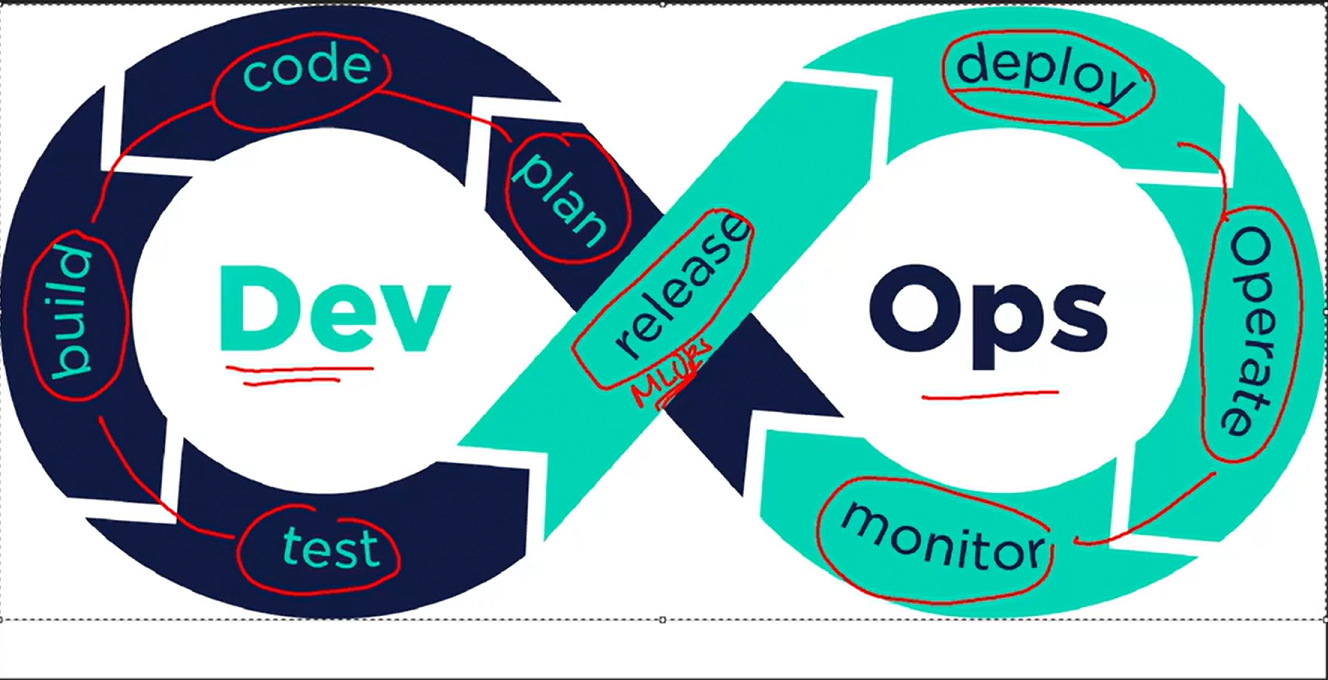

In [60]:
# MLOps is combination of two words development and Operations.

In [61]:
                ##### Satges

# version control(git)      Continious Integration(Jenkins)      Continious Delivery(maven)      Continious Deployment(Docker/kubernates)

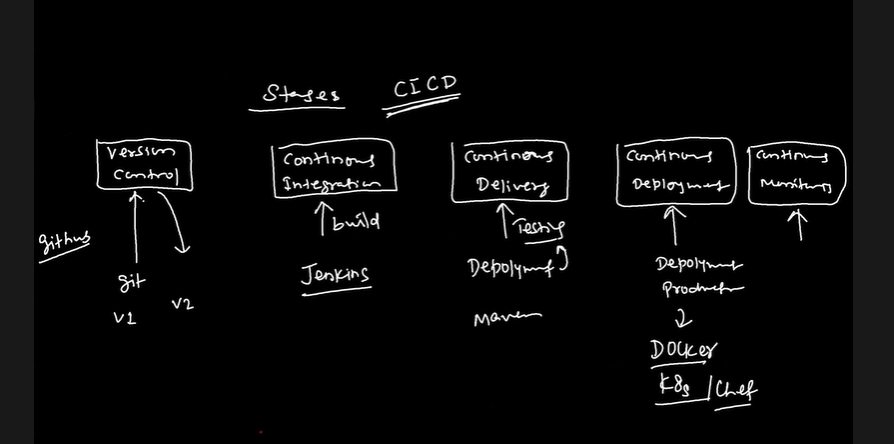

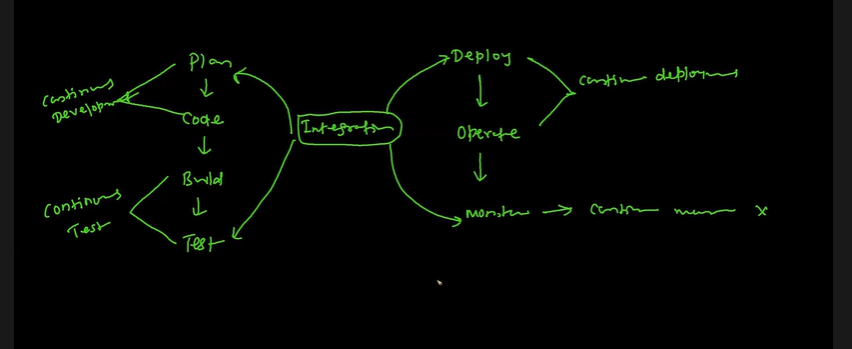

# **5th_Oct (MLFlow)**

MlFlow website - **https://www.google.com/url?q=https%3A%2F%2Fmlflow.org%2Fdocs%2Flatest%2Fintroduction%2Findex.html**

In [62]:
                            #### MLFLOW   ########
# (i) Mlflow is a tool that providing tools for tracking, packaging and managing machine learning code and model.


                                    ########  Benefit of MLflow #######
#(i) its a open source.
#(ii) it will track entire machine learning from data to model building.
# (iii) it will track number of models and also it will compare it.

In [63]:
!pip install mlflow

# mlfow server --port 8000 (jupyter terminal)

In [64]:
import mlflow

In [65]:
# Importing basic package
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder)
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score)
from sklearn.metrics import ConfusionMatrixDisplay

# !pip install feature-engine
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.outliers.winsorizer import Winsorizer

In [66]:
df = pd.read_csv("data/titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [68]:
# Data Cleaning
columns_to_drop = ['passengerid','name','ticket','cabin']

In [69]:
def clean_data(df):
    return (df.rename(columns=str.lower).drop(columns=columns_to_drop).assign(
        family = lambda df_ : df_['sibsp'] + df_['parch']).drop(columns=['sibsp','parch']))

In [70]:
final_df = clean_data(df)
final_df

,survived,pclass,sex,age,fare,embarked,family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,0
887,1,1,female,19.0,30.0000,S,0
888,0,3,female,NaN,23.4500,S,3
889,1,1,male,26.0,30.0000,C,0


In [71]:
final_df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
fare          0
embarked      2
family        0
dtype: int64

In [72]:
final_df['survived'].value_counts(normalize=True)

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [73]:
def create_boxplot(data, column_name, hue=None):
    sns.boxplot(data=data, y=column_name, hue=hue)

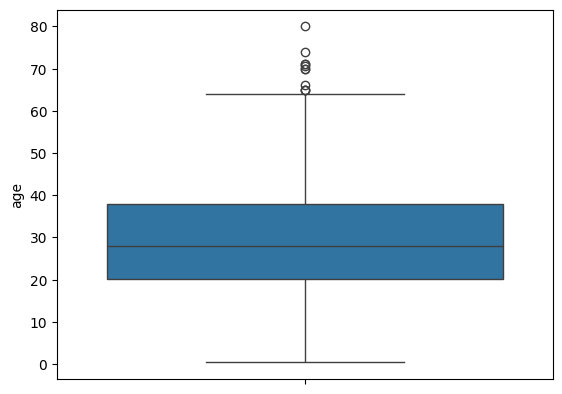

In [74]:
create_boxplot(final_df, 'age')

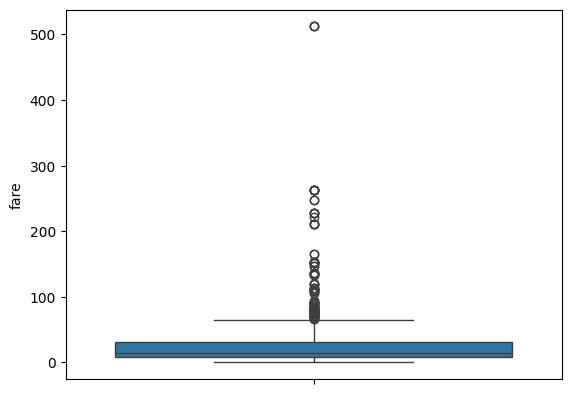

In [75]:
create_boxplot(final_df, 'fare')

In [76]:
def plot_distribution(data, column_name):
    sns.countplot(data=data, x=column_name)

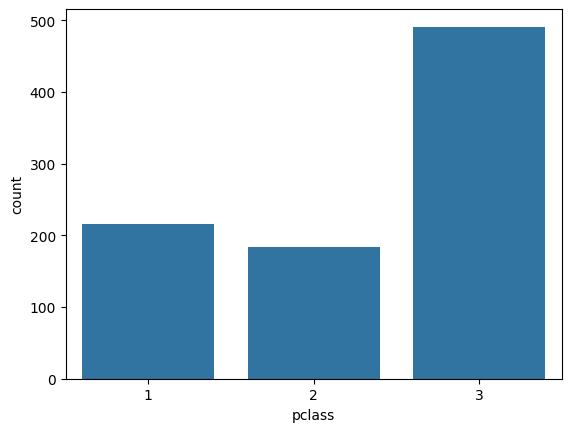

In [77]:
plot_distribution(final_df, 'pclass')

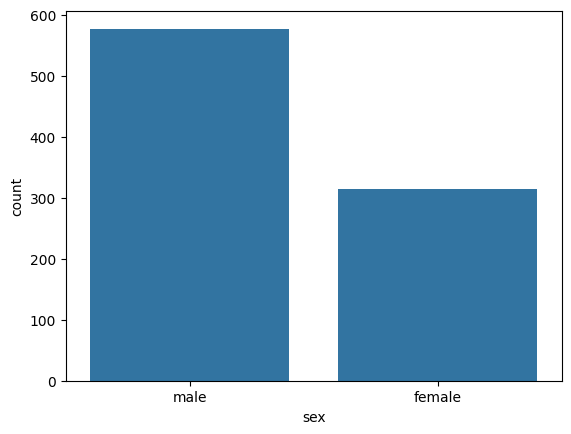

In [78]:
plot_distribution(final_df, 'sex')

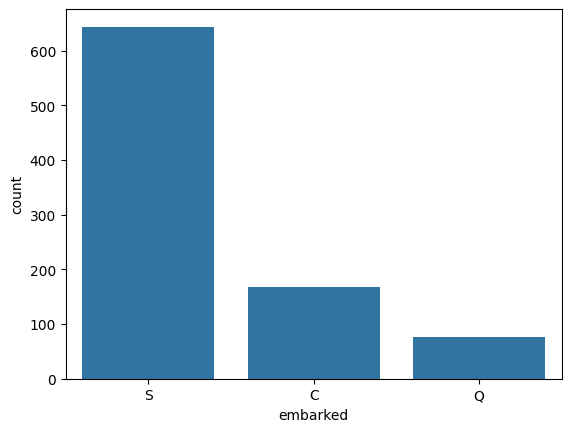

In [79]:
plot_distribution(final_df, 'embarked')

**Feature Engineering**

In [80]:
final_df.head()

,survived,pclass,sex,age,fare,embarked,family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [81]:
final_df['family'].value_counts()

family
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [82]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   family    891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [83]:
# split the data into ind and dep variable
x = final_df.drop(columns=['survived'])
y = final_df['survived']

In [84]:
# split the data into training and testing
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

In [85]:
# Pipeline for individaul columns
age_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('outliers', Winsorizer(capping_method='gaussian', fold=3)),('scale', StandardScaler())])
age_pipe
# here in age column missing value is there and outlier is also there.

#   if column is string type then, we have to use mode to filling the missing value
#   if column is int type then, first we have to check outlier is present or not if outlier will be present then will use median otherwise  will use mean

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('outliers', Winsorizer(fold=3)), ('scale', StandardScaler())])

In [86]:
# Pipeline for individaul columns
fare_pipe = Pipeline(steps=[('outliers', Winsorizer(capping_method='gaussian', fold=3)),('scale', StandardScaler())])
fare_pipe

# Winsorizer is inbuilt approach

# in fare column missing value is not there but outlier is present

Pipeline(steps=[('outliers', Winsorizer(fold=3)), ('scale', StandardScaler())])

In [87]:
embarked_pipe = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('count_encode', CountFrequencyEncoder(encoding_method='count')),
    ('scale', MinMaxScaler())]) # its a char data so use min max approach dont use standarize
   
embarked_pipe   

# in embarked(char data) column has also missing value
# embarked is string type so encoding is required.
# when CountFrequencyEncoder means nominal data(no any sequence or order) like location name,then use one hot encoder 
# ordinal data(order) means sequence(like low midian high, first second third, good better best), then use label encoder

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('count_encode', CountFrequencyEncoder()),
                ('scale', MinMaxScaler())])

In [88]:
set_config(transform_output='pandas')

In [89]:
final_df.columns
# survived is dependent variable

Index(['survived', 'pclass', 'sex', 'age', 'fare', 'embarked', 'family'], dtype='object')

In [90]:
final_df['family'].value_counts()
# 9 unique value is there 

family
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [91]:
# make column transformer approach
preprocessor = ColumnTransformer(transformers=[
    ('age',age_pipe,['age']),
    ('fare',fare_pipe,['fare']),
    ('embarked',embarked_pipe,['embarked']),
    ('sex',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),['sex']),
    ('family',MinMaxScaler(),['family'])
],remainder = 'passthrough',n_jobs = -1)

preprocessor

# remainder = 'passthrough' means any thing apart from this as it is

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('age',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('outliers',
                                                  Winsorizer(fold=3)),
                                                 ('scale', StandardScaler())]),
                                 ['age']),
                                ('fare',
                                 Pipeline(steps=[('outliers',
                                                  Winsorizer(fold=3)),
                                                 ('scale', StandardScaler())]),
                                 ['fare']),
                                ('embarked',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('count_encode',
                                                  CountFrequencyEncoder()),
                                                 ('scale', MinMaxScaler())]),
                                 ['embarked']),
                                ('sex',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['sex']),
                                ('family', MinMaxScaler(), ['family'])])

In [92]:
# fit and transform the training dataset
preprocessor.fit_transform(x_train)

,age__age,fare__fare,embarked__embarked,sex__sex_female,sex__sex_male,family__family,remainder__pclass
692,-0.079150,0.730704,1.000000,0.0,1.0,0.0,3
481,-0.079150,-0.815919,1.000000,0.0,1.0,0.0,2
527,-0.079150,3.999386,1.000000,0.0,1.0,0.0,1
855,-0.893023,-0.559954,1.000000,1.0,0.0,0.1,3
801,0.114630,-0.097302,1.000000,1.0,0.0,0.2,2
...,...,...,...,...,...,...,...
359,-0.079150,-0.600219,0.000000,1.0,0.0,0.0,3
258,0.424677,3.999386,0.181425,1.0,0.0,0.0,1
736,1.432329,0.125127,1.000000,1.0,0.0,0.4,3
462,1.354818,0.238053,1.000000,0.0,1.0,0.0,1


In [93]:
preprocessor.get_params()

{'force_int_remainder_cols': True,
 'n_jobs': -1,
 'remainder': 'passthrough',
 'sparse_threshold': 0.3,
 'transformer_weights': None,
 'transformers': [('age',
   Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                   ('outliers', Winsorizer(fold=3)), ('scale', StandardScaler())]),
   ['age']),
  ('fare',
   Pipeline(steps=[('outliers', Winsorizer(fold=3)), ('scale', StandardScaler())]),
   ['fare']),
  ('embarked',
   Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                   ('count_encode', CountFrequencyEncoder()),
                   ('scale', MinMaxScaler())]),
   ['embarked']),
  ('sex',
   OneHotEncoder(handle_unknown='ignore', sparse_output=False),
   ['sex']),
  ('family', MinMaxScaler(), ['family'])],
 'verbose': False,
 'verbose_feature_names_out': True,
 'age': Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                 ('outliers', Winsorizer(fold=3)), ('scale', StandardScaler())]),
 'fare': Pipelin

**Model Pipeline**

In [94]:
RandomForestClassifier()

RandomForestClassifier()

In [110]:
model_param = {'criterion':'gini',
    'max_depth':6,
    'min_samples_split':2,
    'min_samples_leaf':2,
    'min_weight_fraction_leaf':0.2,
    'max_features':'sqrt',
    'max_leaf_nodes':None,
    'min_impurity_decrease':0.1,
    'bootstrap':True,
    'oob_score':False,
    'n_jobs':-1,
    'random_state':30,
    'verbose':0,
    'warm_start':False}

In [111]:
model_pipe = Pipeline(steps = [
    ('preprocessor',preprocessor),
    ('clf',RandomForestClassifier(**model_param))])

model_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('outliers',
                                                                   Winsorizer(fold=3)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('fare',
                                                  Pipeline(steps=[('outliers',
                                                                   Winsorizer(fold=3)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['fare']),
                                                 ('embarked',
                                                  Pipeline...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('count_encode',
                                                                   CountFrequencyEncoder()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['embarked']),
                                                 ('sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex']),
                                                 ('family', MinMaxScaler(),
                                                  ['family'])])),
                ('clf',
                 RandomForestClassifier(max_depth=6, min_impurity_decrease=0.1,
                                        min_samples_leaf=2,
                                        min_weight_fraction_leaf=0.2, n_jobs=-1,
                                        random_state=30))])

**Logistic Regression**

In [121]:
model_params = { 'penalty' :'l2',
    'dual':False,
    'tol':0.0001,
    'C':1.0,
    'fit_intercept':True,
    'intercept_scaling':1,
    'random_state':42,
    'solver':'lbfgs',
    'max_iter':200,
    'multi_class':'auto',
    'verbose':0,
    'warm_start':False,
    'n_jobs':-1,
   }

In [122]:
model_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('log_reg', LogisticRegression(**model_params))
])
model_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('outliers',
                                                                   Winsorizer(fold=3)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('fare',
                                                  Pipeline(steps=[('outliers',
                                                                   Winsorizer(fold=3)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['fare']),
                                                 ('embarked',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('count_encode',
                                                                   CountFrequencyEncoder()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['embarked']),
                                                 ('sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex']),
                                                 ('family', MinMaxScaler(),
                                                  ['family'])])),
                ('log_reg',
                 LogisticRegression(max_iter=200, multi_class='auto', n_jobs=-1,
                                    random_state=42))])

In [125]:
model_pipe.fit(x_train, y_train)

C:\Users\anasagar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\anasagar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('outliers',
                                                                   Winsorizer(fold=3)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('fare',
                                                  Pipeline(steps=[('outliers',
                                                                   Winsorizer(fold=3)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['fare']),
                                                 ('embarked',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('count_encode',
                                                                   CountFrequencyEncoder()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['embarked']),
                                                 ('sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex']),
                                                 ('family', MinMaxScaler(),
                                                  ['family'])])),
                ('log_reg',
                 LogisticRegression(max_iter=200, multi_class='auto', n_jobs=-1,
                                    random_state=42))])

**Any model we can built below part will be same**

In [126]:
y_pred = model_pipe.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred).item()
recall = recall_score(y_test, y_pred).item()
f1 = f1_score(y_test, y_pred).item()

In [127]:
# metrics dict
metrics = {'accuracy': accuracy, 'precision': precision,
           'recall' : recall, 'f1_score': f1}
metrics

{'accuracy': 0.7988826815642458,
 'precision': 0.7796610169491526,
 'recall': 0.6666666666666666,
 'f1_score': 0.71875}

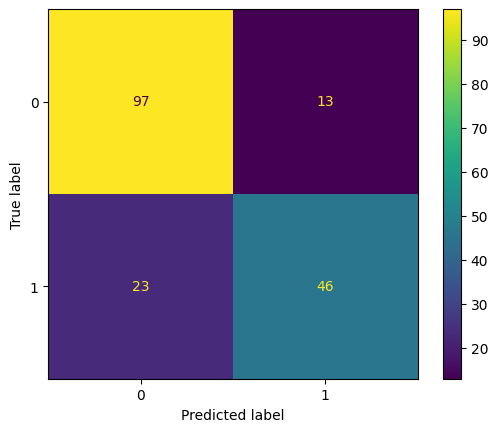

In [128]:
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

**MLFlow Tracking Code**

In [129]:
model_pipe.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('outliers',
                                                                   Winsorizer(fold=3)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('fare',
                                                  Pipeline(steps=[('outliers',
                                                                   Winsorizer(fold=3)),
       

In [130]:
x_test.join(y_test)

,pclass,sex,age,fare,embarked,family,survived
565,3,male,24.0,24.1500,S,2,0
160,3,male,44.0,16.1000,S,1,0
553,3,male,22.0,7.2250,C,0,1
860,3,male,41.0,14.1083,S,2,0
241,3,female,NaN,15.5000,Q,1,1
...,...,...,...,...,...,...,...
880,2,female,25.0,26.0000,S,1,1
91,3,male,20.0,7.8542,S,0,0
883,2,male,28.0,10.5000,S,0,0
473,2,female,23.0,13.7917,C,0,1


In [131]:
# set the url server
mlflow.set_tracking_uri("http://127.0.0.1:8000")
mlflow.set_experiment("Random Forest Model")


<Experiment: artifact_location='mlflow-artifacts:/888414764717765940', creation_time=1733490322814, experiment_id='888414764717765940', last_update_time=1733490322814, lifecycle_stage='active', name='Random Forest Model', tags={}>

In [132]:
# set the url server
mlflow.set_tracking_uri("http://127.0.0.1:8000")
mlflow.set_experiment("Logistic Regression")  # this whole code will be same,doing mlflow for logistic regression that whay i have written Logistic Regression

with mlflow.start_run() as run:
    # Log the data signature
    data_signature = mlflow.models.infer_signature(model_input = x_train, model_output= model_pipe.predict(x_train))
    # log preprocessor parameter
    mlflow.log_params(model_pipe.get_params())
    #log model metrics
    mlflow.log_metrics(metrics)
    # log the model
    mlflow.sklearn.log_model(sk_model=model_pipe, artifact_path="model.pkl", signature=data_signature)
    # get the model uri
    model_uri = mlflow.get_artifact_uri("model.pkl")
    # log the confusion matrix
    mlflow.log_figure(cm.figure_, artifact_file = "confusion_matrix.png")

2024/12/06 19:35:31 INFO mlflow.tracking.fluent: Experiment with name 'Logistic Regression' does not exist. Creating a new experiment.
C:\Users\anasagar\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


🏃 View run resilient-vole-423 at: http://127.0.0.1:8000/#/experiments/109130188631180037/runs/f1f34da52e41470ba59445127f9cc0a5
🧪 View experiment at: http://127.0.0.1:8000/#/experiments/109130188631180037
